# HR Analytics Project- Understanding the Attrition in HR

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix , accuracy_score ,classification_report

import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition[1].csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

Checking the columns

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.isnull().sum().sum()

0

In [8]:
df.duplicated().sum().sum()

0

Now we will check the Uniqueness in every Object column

In [9]:
for column in df:
    if df[column].dtype==object:
        print(df[column].unique() ,'\n', df[column].value_counts(), '\n','-----------------------------------' )

['Yes' 'No'] 
 No     1233
Yes     237
Name: Attrition, dtype: int64 
 -----------------------------------
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] 
 Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64 
 -----------------------------------
['Sales' 'Research & Development' 'Human Resources'] 
 Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64 
 -----------------------------------
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'] 
 Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64 
 -----------------------------------
['Female' 'Male'] 
 Male      882
Female    588
Name: Gender, dtype: int64 
 -----------------------------------
['Sales Executive' 'Research Scientist' 'Laboratory Techn

In as same way we will check the Uniqueness in every non object column

In [10]:
for column in df:
    if df[column].dtype!=object:
        print([column], '\n','Minimum Value', df[column].min() ,'\n', 'Maximum Value',df[column].max(), '\n','-----------------------------------' )

['Age'] 
 Minimum Value 18 
 Maximum Value 60 
 -----------------------------------
['DailyRate'] 
 Minimum Value 102 
 Maximum Value 1499 
 -----------------------------------
['DistanceFromHome'] 
 Minimum Value 1 
 Maximum Value 29 
 -----------------------------------
['Education'] 
 Minimum Value 1 
 Maximum Value 5 
 -----------------------------------
['EmployeeCount'] 
 Minimum Value 1 
 Maximum Value 1 
 -----------------------------------
['EmployeeNumber'] 
 Minimum Value 1 
 Maximum Value 2068 
 -----------------------------------
['EnvironmentSatisfaction'] 
 Minimum Value 1 
 Maximum Value 4 
 -----------------------------------
['HourlyRate'] 
 Minimum Value 30 
 Maximum Value 100 
 -----------------------------------
['JobInvolvement'] 
 Minimum Value 1 
 Maximum Value 4 
 -----------------------------------
['JobLevel'] 
 Minimum Value 1 
 Maximum Value 5 
 -----------------------------------
['JobSatisfaction'] 
 Minimum Value 1 
 Maximum Value 4 
 -------------------

Lets check our Target is balanced or not

In [11]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Our data is imbalanced

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


We will now analysise and visulaize the data 

0    1233
1     237
Name: Attrition, dtype: int64


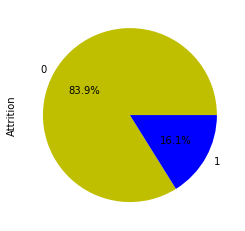

In [13]:
df['Attrition'].replace('No', 0, inplace=True)
df['Attrition'].replace('Yes', 1, inplace=True)
df['Attrition'].value_counts().plot(kind='pie', colors=['y','b'], autopct='%1.1f%%')
print(df['Attrition'].value_counts())

Text(0.5, 1.0, 'Attrition by Gender')

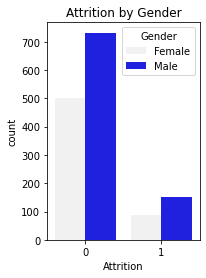

In [14]:
plt.subplot(1,2,1)
sns.countplot(df['Attrition'] ,color ='b' ,hue =df['Gender'])
plt.title('Attrition by Gender')

237 out of 1470 total employee left th company, 16% people left the company, The data is imbalanced

Job Role Visualisation

<AxesSubplot:xlabel='count', ylabel='JobRole'>

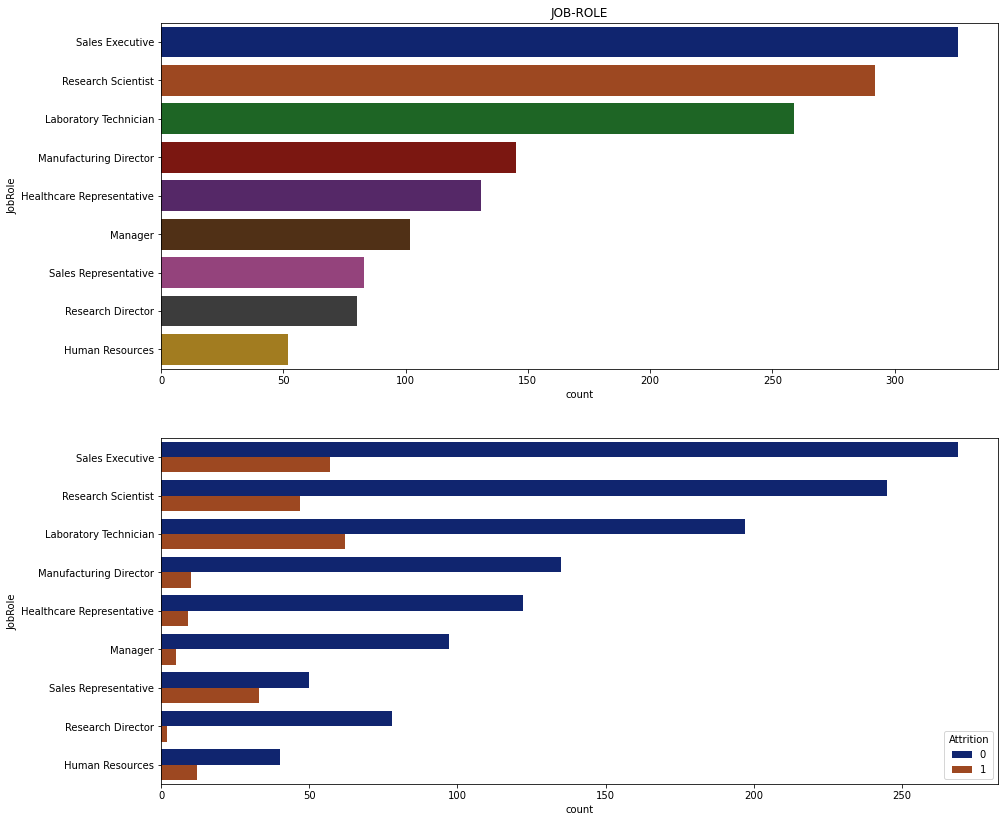

In [15]:
plt.figure(figsize = (15 , 14))
plt.subplot(2 ,1,1)
sns.countplot(y= 'JobRole' ,data = df ,palette='dark')
plt.title('JOB-ROLE')
plt.subplot(2,1,2)
sns.countplot(y= 'JobRole',data = df ,palette='dark' ,hue =df['Attrition'])

Research scientist, Lab Technicians and Sales Executive are having high attrition rate

Department Visualisation

([<matplotlib.patches.Wedge at 0x1e1f6305070>,
 [Text(-0.5108751650946098, 0.9741696801325502, 'Research & Development'),
  Text(0.40962060765041874, -1.1279232942838364, 'Sales'),
  Text(1.0900447132085396, -0.1476567750091844, 'Human Resources')],
 [Text(-0.27865918096069625, 0.5313652800723001, '65.37'),
  Text(0.23894535446274423, -0.6579552549989045, '30.34'),
  Text(0.5945698435682942, -0.08054005909591874, '4.29')])

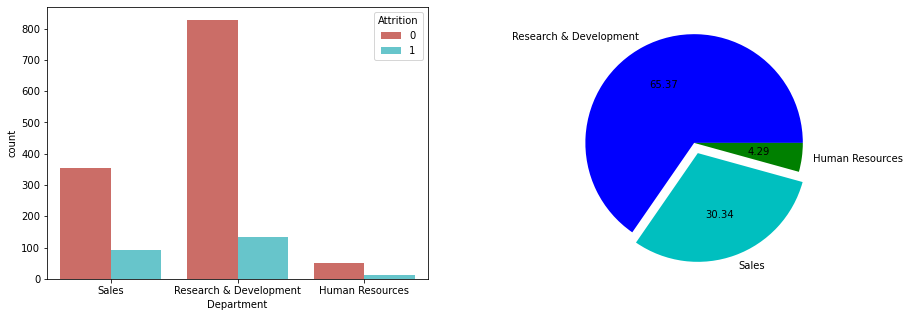

In [16]:
plt.figure(figsize =(15,5))
plt.subplot(1,2,1)
sns.countplot('Department' ,data = df ,hue ='Attrition' ,palette='hls')
plt.subplot(1,2,2)
plt.pie(df['Department'].value_counts() ,autopct ='%.2f' ,colors = ['b' ,'c' ,'g'],labels =['Research & Development','Sales', 'Human Resources'] 
        ,explode =[0 ,0.1,0])

Job Satiscation

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

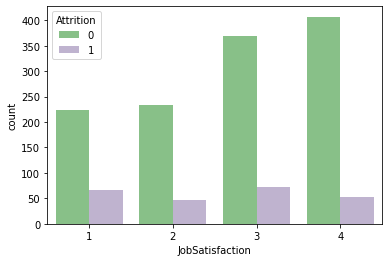

In [17]:
sns.countplot(df['JobSatisfaction'] ,hue =df['Attrition'] ,palette='Accent')

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

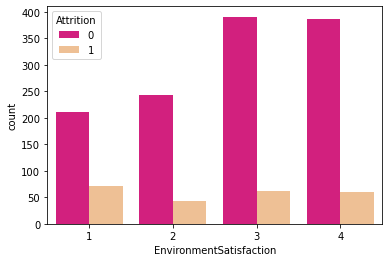

In [18]:
sns.countplot(df['EnvironmentSatisfaction'] ,hue =df['Attrition'] ,palette='Accent_r')

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

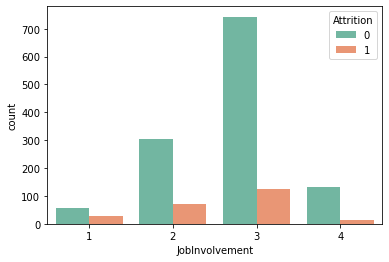

In [19]:
sns.countplot(df['JobInvolvement'] ,hue =df['Attrition'] ,palette="Set2")

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

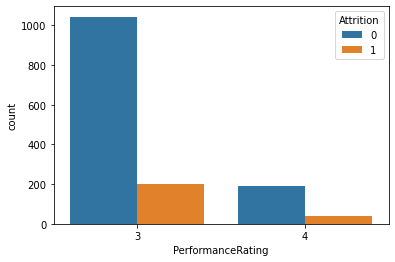

In [20]:
sns.countplot(df['PerformanceRating'] ,hue =df['Attrition'] ,palette='tab10')

<AxesSubplot:xlabel='JobRole', ylabel='MonthlyIncome'>

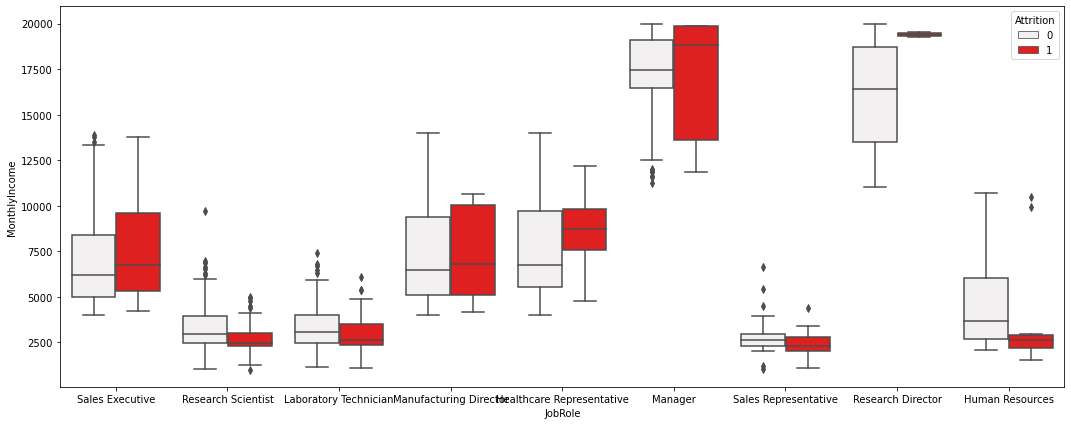

In [21]:
plt.figure(figsize =(18 ,7))
sns.boxplot(x ='JobRole', y = 'MonthlyIncome' ,data = df ,hue ='Attrition' ,color ='red')

Managers and Research Director are getting high salaries, Research scientist, Lap Technicians and sales representative have high attrition. Low monthly income shows high attrition rate

<AxesSubplot:xlabel='Age', ylabel='count'>

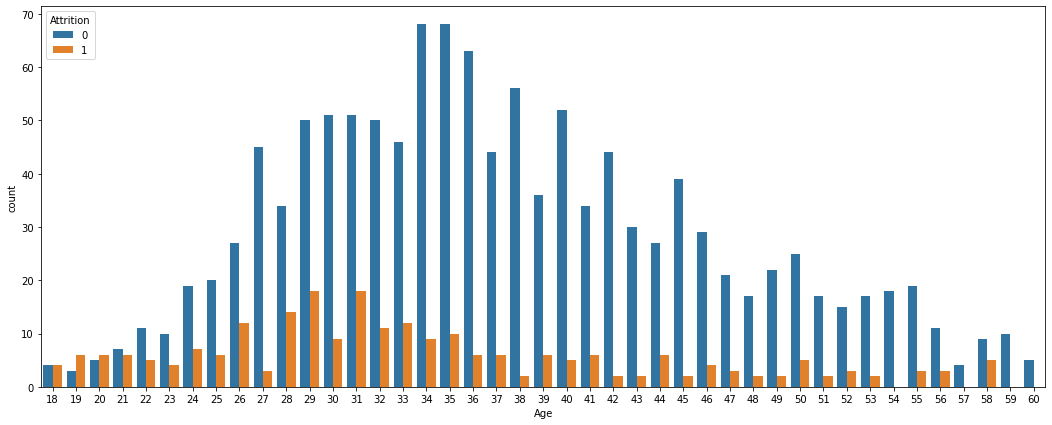

In [22]:
plt.figure(figsize =(18 ,7))
sns.countplot(df['Age'] ,hue =df['Attrition'] ,palette='tab10')

From above graph, we can see, young employees are tend to left the oraganozation more than old age employees

<AxesSubplot:xlabel='OverTime', ylabel='count'>

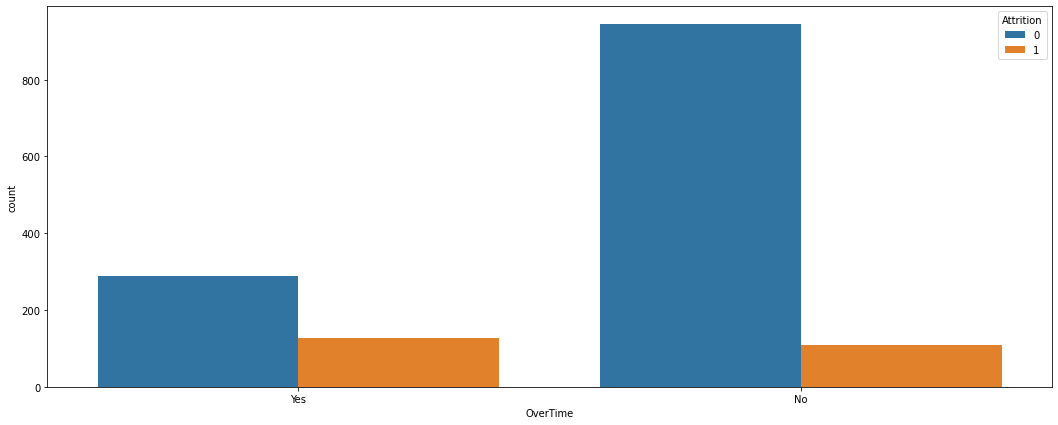

In [23]:
plt.figure(figsize =(18 ,7))
sns.countplot(df['OverTime'] ,hue =df['Attrition'] ,palette='tab10')

we can observe in overtime attritaion rate is more

lets check the distribution of data

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

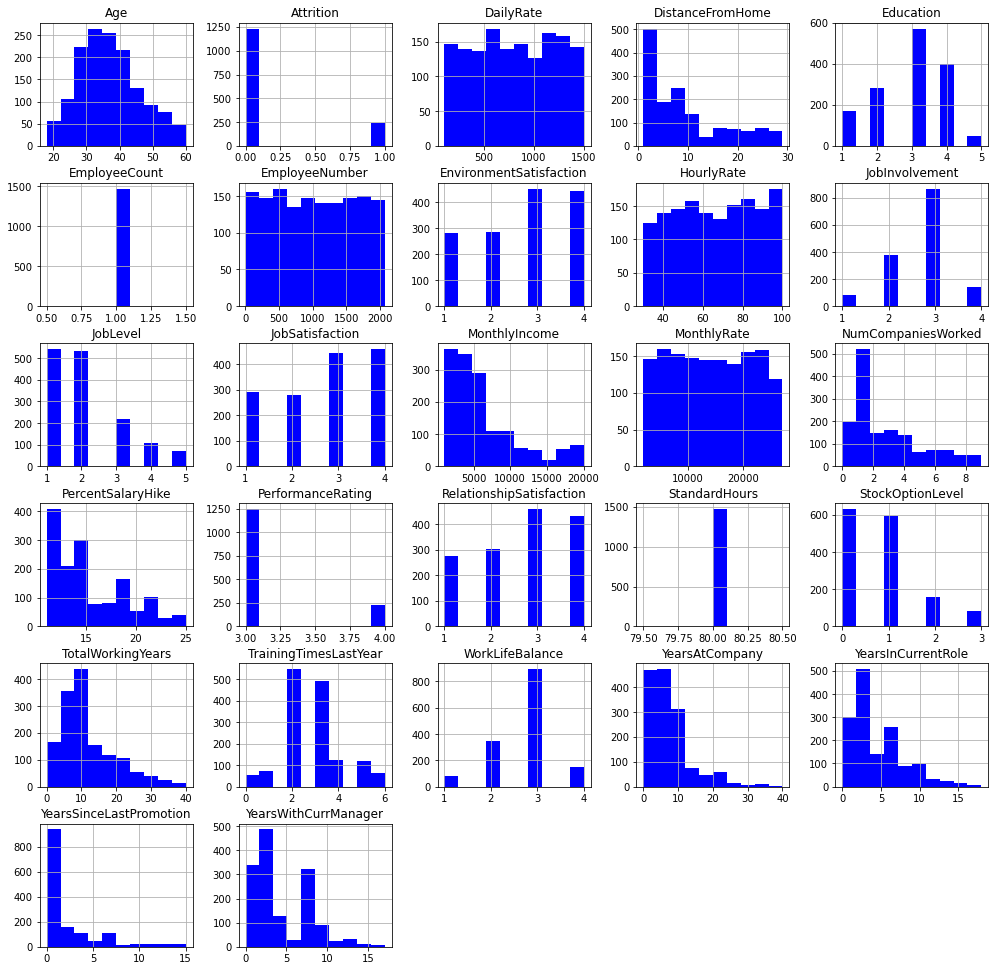

In [24]:
df.hist(figsize=(17,17), facecolor='blue')
plt.tight_layout

1. few of the data are right skewed
2. most of the employee are from the age between 25 to 35 years
3. From above distribution, columns employee count, standarhours are of no value. it will remain same for all the     employees, we will delete the same in preprocessing part 

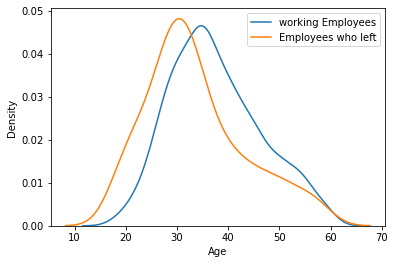

In [25]:
sns.kdeplot(df.loc[df['Attrition'] == 0, 'Age'], label = 'working Employees')
sns.kdeplot(df.loc[df['Attrition'] == 1, 'Age'], label = 'Employees who left')
plt.legend()
plt.show()

Again, Young employees are more likely to leave the organization 

In [26]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Encoding

In [27]:
df.shape

(1470, 35)

In [28]:
for col in df.columns:
    if df[col].dtype == object:
        print(col)

BusinessTravel
Department
EducationField
Gender
JobRole
MaritalStatus
Over18
OverTime


In [29]:
le = LabelEncoder()

In [30]:
btravel_encoding = le.fit_transform(df['BusinessTravel'])
btravel_encoding 

array([2, 1, 2, ..., 2, 1, 2])

In [31]:
dept_encoding = le.fit_transform(df['Department'])
dept_encoding 

array([2, 1, 1, ..., 1, 2, 1])

In [32]:
edu_encoding = le.fit_transform(df['EducationField'])
edu_encoding 

array([1, 1, 4, ..., 1, 3, 3])

In [33]:
gender_encoding = le.fit_transform(df['Gender'])
gender_encoding 

array([0, 1, 1, ..., 1, 1, 1])

In [34]:
jobrole_encoding = le.fit_transform(df['JobRole'])
jobrole_encoding 

array([7, 6, 2, ..., 4, 7, 2])

In [35]:
mstatus_encoding = le.fit_transform(df['MaritalStatus'])
mstatus_encoding 

array([2, 1, 2, ..., 1, 1, 1])

In [36]:
over18_encoding = le.fit_transform(df['Over18'])
over18_encoding 

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
overtime_encoding = le.fit_transform(df['OverTime'])
overtime_encoding 

array([1, 0, 1, ..., 1, 0, 0])

In [38]:
df['BusinessTravel'] = btravel_encoding
df['Department'] = dept_encoding
df['EducationField'] = edu_encoding
df['Gender'] = gender_encoding
df['JobRole'] = jobrole_encoding
df['MaritalStatus'] = mstatus_encoding
df['Over18'] = over18_encoding
df['OverTime'] = overtime_encoding

In [39]:
df.shape

(1470, 35)

In [40]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int32
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

In [42]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

lets now check the co-relation using heatmap

<AxesSubplot:>

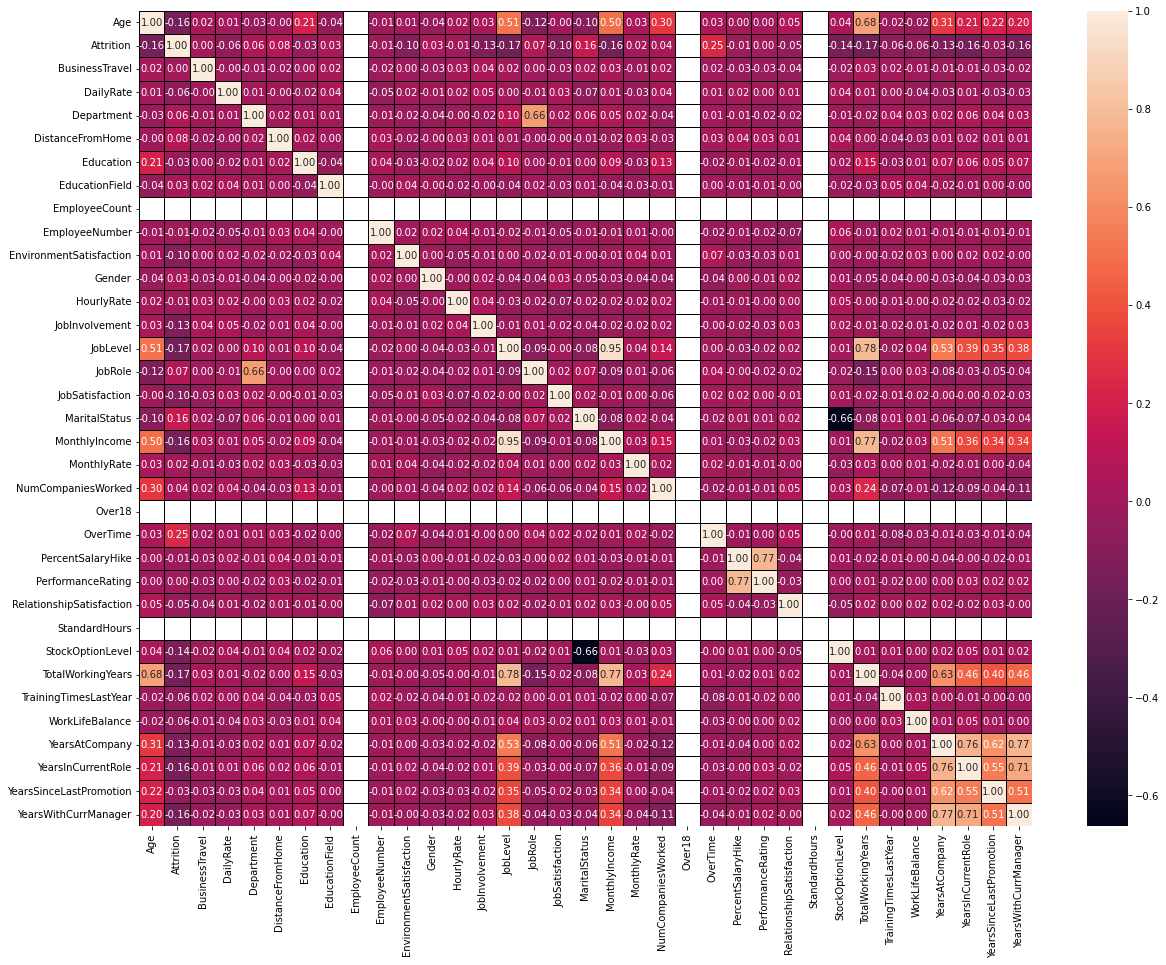

In [43]:
plt.figure(figsize=(20,15))

sns.heatmap(df.corr(), annot=True, linewidth=0.5, linecolor='black',fmt='0.2f')

In [44]:
df.shape

(1470, 35)

After all EDA and Visualization process we will remove over18, Employee count and standard hours column

In [45]:
df = df.drop(columns = ['Over18','EmployeeCount','StandardHours'])

In [46]:
df.shape

(1470, 32)

Splitting Data set into x and y

In [47]:
X = df.drop('Attrition' ,axis =1)
Y = df['Attrition']

print('features shape',x.shape,'\n' 'Label Shape',y.shape)

NameError: name 'x' is not defined

We will balance the data using SMOTE

In [ ]:
smote=SMOTE(sampling_strategy='minority',
    random_state=69)

In [ ]:
x,y = smote.fit_resample(X,Y)
print('features shape',x.shape,'\n' 'Label Shape',y.shape)

Scaling the Data

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

# Model Selection

Logistics Regression

In [ ]:
lr = LogisticRegression()
lr_score = cross_val_score(lr, x_train , y_train ,cv = 7 ,scoring = 'neg_mean_squared_error')
lr_score.mean()

Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()
rf_score = cross_val_score(rf, x_train , y_train ,cv = 7 ,scoring = 'neg_mean_squared_error')
rf_score.mean()

Support Vector Classifier

In [ ]:
svc=SVC()
svc_score = cross_val_score(svc, x_train , y_train ,cv = 7 ,scoring = 'neg_mean_squared_error')
svc_score.mean()

Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier()
dt_score = cross_val_score(dt, x_train , y_train ,cv = 7 ,scoring = 'neg_mean_squared_error')
dt_score.mean()

K Neighbors Classifier

In [ ]:
knn = KNeighborsClassifier()
knn_score = cross_val_score(knn, x_train , y_train ,cv = 7 ,scoring = 'neg_mean_squared_error')
knn_score.mean()

We observed minimum negative mean squared error for Random Forest Classifier, Will hypertune this model

In [ ]:
gcv = GridSearchCV

In [ ]:
params = {
    'max_features': ['auto','sqrt','log2'],
         'max_depth':[4,5,6,7,8],
         'criterion':['gini','entropy'],
         "n_estimators":[10,50,120,350]
         }

In [ ]:
hypt = gcv(rf, params, cv=7, scoring='accuracy')

hypt.fit(x_train,y_train)

hypt.best_params_

We will now Train the Random Forest Model

# Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(n_estimators=350, max_depth=8, max_features= 'auto', criterion='gini')

In [ ]:
maxAcc = 0
maxRS = 0

for i in range(1,500):
    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.70, random_state=i)
    rf.fit(x_train,y_train)
    y_pred_test = rf.predict(x_test)
    y_pred_train = rf.predict(x_train)
    acc=accuracy_score(y_test, y_pred)
    #print('accuracy', acc, 'random state',i)
    
    
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
print('Max Accuracy', maxAcc, 'Max Random State', maxRS)

# Score Report of the Model

In [ ]:
#Testing Report
print(classification_report(y_test , y_pred_test))

In [ ]:
#Training Report
print(classification_report(y_train , y_pred_train))

# Confusion Matrix

In [ ]:
#train
cmtrain = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cmtrain, annot = True, linewidth=0.5)

In [ ]:
#test
cmtest = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cmtest, annot = True, linewidth=0.5)

# AUC ROC curve

In [ ]:
from sklearn.metrics import plot_roc_curve, auc

In [ ]:
#Training Curves and values

plot_roc_curve(rf,x_train,y_train)
plt.legend(prop={'size':10}, loc='lower right')

plt.show

In [ ]:
hypt.best_estimator_

In [ ]:
#Testing Curves and values

plot_roc_curve(hypt.best_estimator_,x_test,y_test)
plt.legend(prop={'size':10}, loc='lower right')

plt.show

As shown in the testing ROC curve AUC is 99%

# Saving Model

In [ ]:
import pickle

In [ ]:
pickle.dump('rf', open('Randomforest_model', 'wb'))